<a href="https://colab.research.google.com/github/SahanashreeTalagade/Arduino-Based-Anti-Sleep-System-Using-Eye-Blink-Sensor-for-Driver-Safety/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Net Transfer Learning
## Simple Transfer Learning Demo (MobileNetV2 + ImageNet Labels)


1. No training


2. Just load model → load labels → upload image → get prediction

In [ ]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import tensorflow_hub as hub
from google.colab.patches import cv2_imshow

In [ ]:
# Load MobileNetV2 (Pretrained on ImageNet)
from tensorflow.keras.layers import Lambda
m = tf.keras.Sequential([
    Lambda(lambda x:hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-224-classification/2")(x))
])
m.build([None, 224, 224, 3])

In [ ]:
#  Download ImageNet Labels
file_path = tf.keras.utils.get_file(
    fname='ImageNetLabels.txt',
    origin='https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt',
    cache_dir='/content',
    cache_subdir=''
)

10484/10484 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
with open(file_path, "r") as f:
    image_labels = f.read().splitlines()

In [ ]:
print("Sample labels:", image_labels[:100])
print("Total classes:", len(image_labels))

Sample labels: ['background', 'tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'Indian cobra', 'green mamba', 'sea snake', 'h

(np.float64(-0.5), np.float64(272.5), np.float64(184.5), np.float64(-0.5))

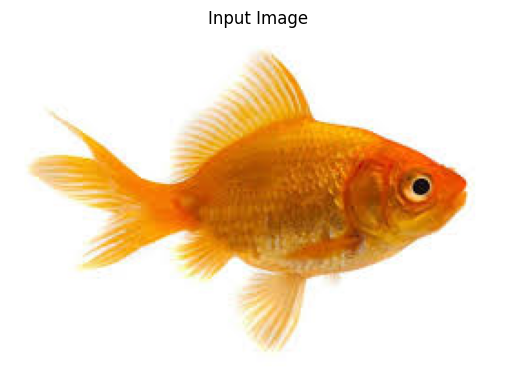

In [ ]:
# Provide an IMAGE URL here

img = cv2.imread("/content/download (10).jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_resized = cv2.resize(img_rgb, (224, 224))
img_input = img_resized / 255.0
img_input = np.expand_dims(img_input, axis=0)

plt.imshow(img_rgb)
plt.title("Input Image")
plt.axis(False)


In [ ]:
pred = m.predict(img_input)
class_id = np.argmax(pred[0])

print("Predicted:", image_labels[class_id])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted: goldfish
